In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LA_X_df, get_y_df, data_prep
from model_arch import build_LA_model
from hyperparameters import EPOCHS, LEARNING_RATE, BATCH_SIZE
from predictions import generate_predictions, generate_csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2023-10-30 20:15:29.243649: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 20:15:29.274383: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 20:15:29.275100: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 20:15:29.951510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0
importing Jupyter notebook from predictions.ipynb


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../../../data/csv/plant_data.csv"
checkpoint_filepath = "../../../data/csv/"

In [4]:
df = pd.read_csv(data_filepath)
df['LA_mm2'].mean()

705.8715641547861

In [5]:
X = get_LA_X_df(data_filepath)
y = get_y_df(data_filepath, "LA_mm2")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [6]:
model = build_LA_model()
print('Input shape:', X_train[0].shape)

Input shape: (12,)


2023-10-30 20:15:31.246604: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 20:15:31.265929: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [8]:
history = model.fit (
    X_train, y_train,
    epochs = 500,
    validation_split = 0.2
)

Epoch 1/500


11/11 [==============================] - 1s 13ms/step - loss: 824373.7500 - val_loss: 777587.7500
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 821622.9375 - val_loss: 776284.0625
Epoch 3/500
11/11 [==============================] - 0s 3ms/step - loss: 819466.1875 - val_loss: 774774.7500
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 817735.2500 - val_loss: 773187.7500
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 816346.5625 - val_loss: 771722.4375
Epoch 6/500
11/11 [==============================] - 0s 3ms/step - loss: 814896.5625 - val_loss: 770301.8125
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 813535.9375 - val_loss: 768989.9375
Epoch 8/500
11/11 [==============================] - 0s 3ms/step - loss: 812172.6250 - val_loss: 767729.0625
Epoch 9/500
11/11 [==============================] - 0s 3ms/step - loss: 810836.5625 - val_loss: 766394.0625
Epoch 10/500
11/11 [==========

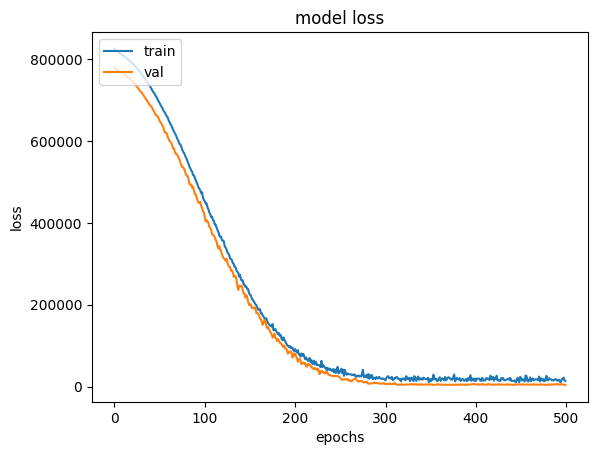

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 3345.5627


3345.562744140625

In [11]:
figures_filepath = "../../../figures/LA_error_csv"
generate_csv(model, X_test, y_test, "LA_predictions", "LA_actual", figures_filepath)

2/2 [==============================] - 0s 2ms/step
